<a href="https://colab.research.google.com/github/LucjanSakowicz/data-science-bootcamp/blob/main/09_exercises/231_240_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Science Bootcamp

### Spis treści:
* [Import biblioteki](#0)
* [Ćwiczenie 231](#1)
* [Ćwiczenie 232](#2)
* [Ćwiczenie 233](#3)
* [Ćwiczenie 234](#4)
* [Ćwiczenie 235](#5)
* [Ćwiczenie 236](#6)
* [Ćwiczenie 237](#7)
* [Ćwiczenie 238](#8)
* [Ćwiczenie 239](#9)
* [Ćwiczenie 240](#10)

### <a name='0'></a>Import biblioteki

In [1]:
import numpy as np
import pandas as pd

np.__version__

'1.22.4'

### <a name='1'></a> Ćwiczenie 231
Zaimportuj bibliotekę _tensorflow_ w wersji 2.x.

In [2]:
%tensorflow_version 2.x
import tensorflow as tf

tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.12.0'

Załaduj dane Fashion MNIST wykorzystując bibliotekę _tensorflow_. Odpowiednio zbiór treningowy (_X\_train_, _y\_train_) oraz testowy (_X\_test_, _y\_test_).

In [5]:
from tensorflow.keras.datasets.fashion_mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()

Sprawdź rozmiar zbiorów treningowych i testowych.

In [6]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


### <a name='2'></a> Ćwiczenie 232 
Wykorzytując bibliotekę _matplotlib_ wyświetl obraz ze zbioru treningowego z indeksem 40.

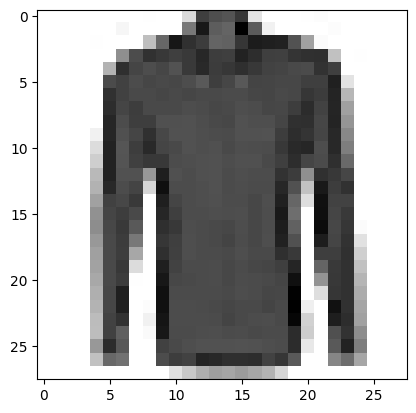

In [8]:
import matplotlib.pyplot as plt

plt.imshow(X_train[40], cmap='gray_r')

Wyświetl numer klasy dla próbki ze zbioru treningowego z ineksem 40.

In [9]:
y_train[40]

6

### <a name='3'></a> Ćwiczenie 233
Wystandaryzuj dane. Podziel wartości tablic _X\_train_ oraz _X\_test_ przez wartość 255.0.

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### <a name='4'></a> Ćwiczenie 234
Zaimportuj klasę _Sequential_ z biblioteki _tensorflow_ wykorzystując pakiet _keras_.

In [12]:
from tensorflow.keras.models import Sequential

Zaimportuj warstwy _Flatten_ oraz _Dense_ z biblioteki _tensorflow_ wykorzystując pakiet _keras_.

In [14]:
from tensorflow.keras.layers import Flatten, Dense

### <a name='5'></a> Ćwiczenie 235
Zbuduj model klasy _Sequential_.

In [15]:
model = Sequential()

Dodaj pierwszą warstwę typu _Flatten_ wraz z odpowiednio dobranym parametrem _input_shape_.

In [16]:
model.add(Flatten(input_shape=(28, 28)))

Dodaj kolejną warstwę typu _Dense_ z 128 neuronami i funkcją aktywacji _relu_.

In [17]:
model.add(Dense(units=128, activation='relu'))

Dodaj ostatnią warstwę typu _Dense_ z 10 neuronami i funkcją aktywacji _softmax_.

In [18]:
model.add(Dense(units=10, activation='softmax'))

Wyświetl podsumowanie modelu.

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### <a name='6'></a> Ćwiczenie 236
Skompiluj model. Wykorzystaj optymalizator _rmsprop_, funkcję straty _sparse_categorical_crossentropy_ oraz metrykę _accuracy_.

In [20]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### <a name='7'></a> Ćwiczenie 237
Dopasuj model do danych treningowych, ustawiając 10 epok oraz podział na zbiór walidacyjny wynoszący 0.2.

In [21]:
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.5205 - accuracy: 0.8148 - val_loss: 0.4166 - val_accuracy: 0.8539
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3854 - accuracy: 0.8622 - val_loss: 0.3813 - val_accuracy: 0.8637
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3480 - accuracy: 0.8743 - val_loss: 0.3748 - val_accuracy: 0.8732
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3297 - accuracy: 0.8808 - val_loss: 0.3751 - val_accuracy: 0.8684
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3128 - accuracy: 0.8885 - val_loss: 0.3596 - val_accuracy: 0.8786
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3006 - accuracy: 0.8911 - val_loss: 0.3804 - val_accuracy: 0.8762
Epoch 7/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2926 - accuracy: 0.8956 - val_loss: 0.3390 - val_accuracy

### <a name='8'></a> Ćwiczenie 238
Dokonaj predykcji modelu na podstawie danych testowych.

In [25]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_pred

313/313 [==============================] - 1s 4ms/step


array([9, 2, 1, ..., 8, 1, 5])

Zbuduj macierz konfuzji (macierz pomyłek).

In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[852,   2,  17,  23,   6,   2,  82,   0,  16,   0],
       [  4, 962,   1,  24,   3,   0,   4,   0,   2,   0],
       [ 19,   0, 754,  10, 146,   0,  69,   0,   2,   0],
       [ 33,   3,  14, 890,  26,   0,  26,   0,   8,   0],
       [  0,   0,  65,  43, 824,   1,  62,   0,   5,   0],
       [  0,   0,   0,   1,   0, 969,   0,  16,   1,  13],
       [151,   0,  92,  30,  72,   0, 636,   0,  19,   0],
       [  0,   0,   0,   0,   0,  33,   0, 939,   2,  26],
       [  2,   1,   5,   2,   4,   3,   4,   2, 977,   0],
       [  0,   0,   0,   0,   0,  11,   1,  32,   0, 956]])

### <a name='9'></a> Ćwiczenie 239
Zbuduj obiekt pandas _DataFrame_ zawierający predykcje modelu. Nadaj nazwę kolumny _prediction_ i przypisz do zmiennej _results_.

In [28]:
results = pd.DataFrame(y_pred, columns=['predictions'])

Przypisz nową kolumnę z wartościami ze zmiennej _y\_test_ i nazwij ją _y\_test_.

In [29]:
results['y_test'] = y_test

Przypisz nową kolumnę o nazwie _is_misclassified_, która zwróci 1, gdy próbki zostaną błędnie sklasyfikowane, w przeciwnym przypadku 0.

In [31]:
results['is_misclassified'] = (results['predictions'] != results['y_test']).astype(int)

### <a name='10'></a> Ćwiczenie 240
Zapisz obiekt _results_ do pliku _results.csv_.

In [33]:
results.to_csv('results.csv')

In [34]:
!head results.csv

,predictions,y_test,is_misclassified
0,9,9,0
1,2,2,0
2,1,1,0
3,1,1,0
4,6,6,0
5,1,1,0
6,4,4,0
7,6,6,0
8,5,5,0
